In [121]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

from module import getTickerHistory, addFixedInvestment, test

# rate=94% TQQQ : 598%
# rate=95% QQQ : 143%

def getDecimal(x):
    return round(x, 2)

def getReturn(df, col):
    return_tot = 100 *(df[col][-1] - df[col][0]) / df[col][0]
    return round(return_tot,2)

def backtesting(df, rate):
    thesthold = 0

    prices= df['Close'].to_list()
    peaks, thestholds, equities = [], [], []
    share, equity, peak, error = 1, 0, 0, 10**-10
    
    print("side","peak", "thresthold", "price", "equity", "share")

    count = 1 #  hour or day
    cost = 0
    for i , price in enumerate(prices): 
        peak= max(peak, price)
        peaks.append(peak)
        thesthold= peak * rate + cost
        thestholds.append(thesthold)
        
#         if False:
        if count < i < len(prices)- count: # remove a few starting and end days
            # sell
             if share > 0 and prices[i-count] > thesthold > prices[i]: # 101 100 99
#             if share > 0 and prices[i - count] > thesthold > prices[i] and prices[i - 7*count] > thesthold: # 101 100 99
#            if share > 0 and price < thesthold: # 101 100 99
                equity = share * price
                print("sell", str(df.index[i]), getDecimal(peak), getDecimal(thesthold), getDecimal(price), getDecimal(equity),  getDecimal(share) )
                share = 0
                cost = 1
            # buy
             if share ==0 and prices[i-count] < thesthold < prices[i]:  # 99 100 101
#             if share ==0 and prices[i- count] < thesthold < prices[i] and prices[i- 7*count] < thesthold:  # 99 100 101
#            if share == 0 and thesthold < price: # 101 100 99
                print("buy", str(df.index[i]), getDecimal(peak), getDecimal(thesthold), getDecimal(price), getDecimal(equity),  getDecimal(share))
                share = 1.0 * equity / price
                equity = 0
                cost = -1

        if cost > 0 : cost -= 1
        if cost < 0 : cost += 1
        equities.append(equity + share*price)
    

    df['equities']= equities
    df['peak'] = peaks
    df['thesthold'] = thestholds
    print(df['equities'][0], df['equities'][-1])
    strategyReturn = getReturn(df, 'equities')
    priceReturn = getReturn(df, 'Open')
    print(rate,str(priceReturn) + "%",  str(strategyReturn) + "%" )
    return df, strategyReturn

In [122]:
name = "BTC-USD"
name = "VOO"  # rate= 0.94
name = "QQQ"  # rate= 0.98
name = "TQQQ" 


start = "2020-11-13"
end = "2021-11-13" 

start = "2020-11-13"
end = None
interval = '1d'
rate = 0.96

df = getTickerHistory(name, interval, start, end)
df, return_tot = backtesting(df, rate)
df

side peak thresthold price equity share
sell 2020-12-09 00:00:00 86.0 82.56 80.24 80.24 1
buy 2020-12-15 00:00:00 86.0 82.56 84.93 80.24 0
sell 2021-01-04 00:00:00 90.9 87.26 86.93 82.12 0.94
buy 2021-01-05 00:00:00 90.9 87.26 89.11 82.12 0
sell 2021-01-06 00:00:00 90.9 87.26 85.42 78.72 0.92
buy 2021-01-07 00:00:00 91.59 87.93 91.59 78.72 0
sell 2021-01-11 00:00:00 95.14 91.33 90.93 78.16 0.86
buy 2021-01-13 00:00:00 95.14 91.33 92.3 78.16 0
sell 2021-01-14 00:00:00 95.14 91.33 90.89 76.97 0.85
buy 2021-01-19 00:00:00 95.14 91.33 92.53 76.97 0
sell 2021-01-27 00:00:00 103.42 99.28 95.08 79.09 0.83
buy 2021-02-02 00:00:00 103.42 99.28 101.82 79.09 0
sell 2021-02-19 00:00:00 110.11 105.71 104.82 81.42 0.78
buy 2021-04-09 00:00:00 110.11 105.71 107.27 81.42 0
sell 2021-04-20 00:00:00 111.81 107.34 106.38 80.75 0.76
buy 2021-04-21 00:00:00 111.81 107.34 109.07 80.75 0
sell 2021-04-22 00:00:00 111.81 107.34 105.1 77.81 0.74
buy 2021-04-23 00:00:00 111.81 107.34 109.06 77.81 0
sell 2021-05-

/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


,Open,High,Low,Close,Volume,Date,RecurringInvestment,equities,peak,thesthold
Date,,,,,,,,,,
2020-11-13,71.889999,73.040001,70.330002,72.570000,52373800,18579.0,0.287976,72.570000,72.570000,69.667200
2020-11-16,72.375000,74.504997,71.870003,74.239998,53437200,18582.0,0.582579,74.239998,74.239998,71.270398
2020-11-17,74.400002,74.680000,73.065002,73.555000,45676000,18583.0,0.865180,73.555000,74.239998,71.270398
2020-11-18,73.129997,74.375000,71.849998,71.849998,38585400,18584.0,1.133102,71.849998,74.239998,71.270398
2020-11-19,71.455002,73.845001,70.980003,73.629997,39835400,18585.0,1.449149,73.629997,74.239998,71.270398
...,...,...,...,...,...,...,...,...,...,...
2021-11-08,170.500000,171.899994,169.059998,169.860001,28229900,18939.0,113.431933,107.609519,170.559998,163.737598
2021-11-09,171.250000,171.789993,164.570007,166.360001,44059400,18940.0,111.382621,105.392203,170.559998,163.737598
2021-11-10,162.720001,166.399994,156.500000,159.070007,48488400,18941.0,106.789745,100.773854,170.559998,163.737598


In [123]:
return_tot

38.86

<AxesSubplot:xlabel='Date'>

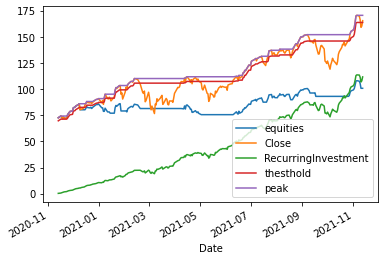

In [124]:
df[['equities', 'Close', 'RecurringInvestment', 'thesthold', 'peak']].plot()

In [109]:
# name = "TQQQ" 
# start = "2020-01-01"
# end = "2021-10-28" 
# interval = '1h'

def getBestRate(name, start, end, interval):
    result = []
    for i in range(60, 99):
        rate = 1.0 * i/100
        df = getTickerHistory(name, start, end, interval)
        df, return_tot = backtesting(df, rate)
        result.append( [ return_tot, rate])

    result.sort(reverse=True)
    print( result )
    
getBestRate(name, interval, start, end)

/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.6 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.61 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.62 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.63 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.64 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.65 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.66 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.67 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.68 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
72.56999969482422 165.4499969482422
0.69 125.08% 127.99%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-03-08 00:00:00 110.11 77.08 76.6 76.6 1
72.56999969482422 76.5999984741211
0.7 125.08% 5.55%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return
/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-03-08 00:00:00 110.11 78.18 76.6 76.6 1
72.56999969482422 76.5999984741211
0.71 125.08% 5.55%
side peak thresthold price equity share
sell 2021-03-08 00:00:00 110.11 79.28 76.6 76.6 1
72.56999969482422 76.5999984741211
0.72 125.08% 5.55%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-03-04 00:00:00 110.11 80.38 80.17 80.17 1
72.56999969482422 80.16999816894531
0.73 125.08% 10.47%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-03-04 00:00:00 110.11 81.48 80.17 80.17 1
72.56999969482422 80.16999816894531
0.74 125.08% 10.47%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-03-04 00:00:00 110.11 82.58 80.17 80.17 1
72.56999969482422 80.16999816894531
0.75 125.08% 10.47%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-03-04 00:00:00 110.11 83.68 80.17 80.17 1
72.56999969482422 80.16999816894531
0.76 125.08% 10.47%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-03-03 00:00:00 110.11 84.78 84.34 84.34 1
72.56999969482422 84.33999633789062
0.77 125.08% 16.22%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-03-03 00:00:00 110.11 85.89 84.34 84.34 1
buy 2021-03-19 00:00:00 110.11 85.89 86.48 84.34 0
sell 2021-03-24 00:00:00 110.11 85.89 85.36 83.25 0.98
72.56999969482422 83.24770882773315
0.78 125.08% 14.71%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-03-03 00:00:00 110.11 86.99 84.34 84.34 1
72.56999969482422 84.33999633789062
0.79 125.08% 16.22%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-02-25 00:00:00 110.11 88.09 87.9 87.9 1
72.56999969482422 87.9000015258789
0.8 125.08% 21.12%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-02-25 00:00:00 110.11 89.19 87.9 87.9 1
buy 2021-03-15 00:00:00 110.11 89.19 91.35 87.9 0
sell 2021-03-24 00:00:00 110.11 89.19 85.36 82.14 0.96
72.56999969482422 82.13622670201272
0.81 125.08% 13.18%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-02-25 00:00:00 110.11 90.29 87.9 87.9 1
buy 2021-03-15 00:00:00 110.11 90.29 91.35 87.9 0
sell 2021-05-12 00:00:00 111.81 91.68 88.25 84.92 0.96
buy 2021-10-13 00:00:00 152.07 124.7 126.27 84.92 0
72.56999969482422 111.26578769028806
0.82 125.08% 53.32%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-02-25 00:00:00 110.11 91.39 87.9 87.9 1
buy 2021-03-16 00:00:00 110.11 91.39 92.85 87.9 0
sell 2021-05-12 00:00:00 111.81 92.8 88.25 83.55 0.95
buy 2021-10-13 00:00:00 152.07 126.22 126.27 83.55 0
72.56999969482422 109.46827897431378
0.83 125.08% 50.85%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-02-25 00:00:00 110.11 92.49 87.9 87.9 1
buy 2021-03-16 00:00:00 110.11 92.49 92.85 87.9 0
sell 2021-05-12 00:00:00 111.81 93.92 88.25 83.55 0.95
buy 2021-10-07 00:00:00 152.07 127.74 129.47 83.55 0
72.56999969482422 106.76264067570379
0.84 125.08% 47.12%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-02-25 00:00:00 110.11 93.59 87.9 87.9 1
buy 2021-03-17 00:00:00 110.11 93.59 94.02 87.9 0
sell 2021-05-12 00:00:00 111.81 95.04 88.25 82.51 0.93
buy 2021-10-07 00:00:00 152.07 129.26 129.47 82.51 0
72.56999969482422 105.43407123768785
0.85 125.08% 45.29%
side

/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


 peak thresthold price equity share
sell 2021-02-25 00:00:00 110.11 94.69 87.9 87.9 1
buy 2021-04-01 00:00:00 110.11 94.69 95.9 87.9 0
sell 2021-05-10 00:00:00 111.81 96.16 96.0 87.99 0.92
buy 2021-05-20 00:00:00 111.81 96.16 98.07 87.99 0
sell 2021-09-28 00:00:00 152.07 130.78 126.83 113.8 0.9
buy 2021-10-14 00:00:00 152.07 130.78 133.24 113.8 0
72.56999969482422 141.3056242222147
0.86 125.08% 94.72%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-02-25 00:00:00 110.11 95.8 87.9 87.9 1
buy 2021-04-01 00:00:00 110.11 95.8 95.9 87.9 0
sell 2021-05-10 00:00:00 111.81 97.27 96.0 87.99 0.92
buy 2021-05-20 00:00:00 111.81 97.27 98.07 87.99 0
sell 2021-09-28 00:00:00 152.07 132.3 126.83 113.8 0.9
buy 2021-10-14 00:00:00 152.07 132.3 133.24 113.8 0
72.56999969482422 141.3056242222147
0.87 125.08% 94.72%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-01-29 00:00:00 103.42 91.01 90.47 90.47 1
buy 2021-04-05 00:00:00 110.11 96.9 101.66 90.47 0
sell 2021-05-10 00:00:00 111.81 98.39 96.0 85.43 0.89
buy 2021-05-24 00:00:00 111.81 98.39 101.28 85.43 0
sell 2021-09-20 00:00:00 152.07 133.82 133.49 112.6 0.84
buy 2021-10-15 00:00:00 152.07 133.82 135.71 112.6 0
72.56999969482422 137.27949193435472
0.88 125.08% 89.17%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-01-29 00:00:00 103.42 92.04 90.47 90.47 1
buy 2021-04-05 00:00:00 110.11 98.0 101.66 90.47 0
sell 2021-05-05 00:00:00 111.81 99.51 99.15 88.24 0.89
buy 2021-05-24 00:00:00 111.81 99.51 101.28 88.24 0
sell 2021-06-03 00:00:00 111.81 99.51 98.91 86.17 0.87
buy 2021-10-15 00:00:00 152.07 135.34 135.71 86.17 0
72.56999969482422 105.0554584708291
0.89 125.08% 44.76%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-01-29 00:00:00 103.42 93.08 90.47 90.47 1
buy 2021-04-05 00:00:00 110.11 99.1 101.66 90.47 0
sell 2021-05-04 00:00:00 111.81 100.63 100.32 89.28 0.89
buy 2021-05-24 00:00:00 111.81 100.63 101.28 89.28 0
sell 2021-06-03 00:00:00 111.81 100.63 98.91 87.19 0.88
buy 2021-10-18 00:00:00 152.07 136.86 139.78 87.19 0
72.56999969482422 103.20013347108059
0.9 125.08% 42.21%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-01-29 00:00:00 103.42 94.11 90.47 90.47 1
buy 2021-04-05 00:00:00 110.11 100.2 101.66 90.47 0
sell 2021-05-04 00:00:00 111.81 101.75 100.32 89.28 0.89
buy 2021-05-25 00:00:00 111.81 101.75 101.77 89.28 0
sell 2021-09-20 00:00:00 152.07 138.38 133.49 117.1 0.88
buy 2021-10-18 00:00:00 152.07 138.38 139.78 117.1 0
72.56999969482422 138.60941136784828
0.91 125.08% 91.0%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-01-29 00:00:00 103.42 95.15 90.47 90.47 1
buy 2021-04-05 00:00:00 110.11 101.3 101.66 90.47 0
sell 2021-05-04 00:00:00 111.81 102.87 100.32 89.28 0.89
buy 2021-06-04 00:00:00 111.81 102.87 103.98 89.28 0
sell 2021-09-20 00:00:00 152.07 139.9 133.49 114.61 0.86
buy 2021-10-19 00:00:00 152.07 139.9 142.85 114.61 0
72.56999969482422 132.7478272064245
0.92 125.08% 82.92%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-01-29 00:00:00 103.42 96.18 90.47 90.47 1
buy 2021-04-08 00:00:00 110.11 102.4 105.36 90.47 0
sell 2021-05-04 00:00:00 111.81 103.98 100.32 86.14 0.86
buy 2021-06-07 00:00:00 111.81 103.98 104.9 86.14 0
sell 2021-09-20 00:00:00 152.07 141.43 133.49 109.62 0.82
buy 2021-10-19 00:00:00 152.07 141.43 142.85 109.62 0
72.56999969482422 126.96268857349354
0.93 125.08% 74.95%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2020-12-11 00:00:00 86.0 80.84 80.65 80.65 1
buy 2021-04-08 00:00:00 110.11 103.5 105.36 80.65 0
sell 2021-04-22 00:00:00 111.81 105.1 105.1 80.45 0.77
buy 2021-06-09 00:00:00 111.81 105.1 105.14 80.45 0
sell 2021-07-19 00:00:00 131.41 123.53 122.52 93.75 0.77
buy 2021-10-21 00:00:00 152.07 142.95 144.95 93.75 0
72.56999969482422 107.00864977523116
0.94 125.08% 47.46%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-01-06 00:00:00 90.9 86.36 85.42 85.42 1
buy 2021-04-08 00:00:00 110.11 104.6 105.36 85.42 0
sell 2021-04-22 00:00:00 111.81 106.22 105.1 85.21 0.81
buy 2021-06-10 00:00:00 111.81 106.22 108.36 85.21 0
sell 2021-07-19 00:00:00 131.41 124.84 122.52 96.34 0.79
buy 2021-10-21 00:00:00 152.07 144.47 144.95 96.34 0
72.56999969482422 109.96969825545786
0.95 125.08% 51.54%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2021-01-04 00:00:00 90.9 87.26 86.93 86.93 1
buy 2021-01-05 00:00:00 90.9 87.26 89.11 86.93 0
sell 2021-01-06 00:00:00 90.9 87.26 85.42 83.33 0.98
buy 2021-01-13 00:00:00 95.14 91.33 92.3 83.33 0
sell 2021-02-19 00:00:00 110.11 105.71 104.82 94.63 0.9
buy 2021-04-09 00:00:00 110.11 105.71 107.27 94.63 0
sell 2021-04-22 00:00:00 111.81 107.34 105.1 92.72 0.88
buy 2021-04-23 00:00:00 111.81 107.34 109.06 92.72 0
sell 2021-07-16 00:00:00 131.41 126.15 125.53 106.72 0.85
buy 2021-08-23 00:00:00 141.85 136.18 141.85 106.72 0
sell 2021-09-10 00:00:00 152.07 145.99 145.55 109.51 0.75
buy 2021-10-26 00:00:00 152.07 145.99 146.88 109.51 0
72.56999969482422 123.34968623759754
0.96 125.08% 69.97%


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


side peak thresthold price equity share
sell 2020-11-18 00:00:00 74.24 72.01 71.85 71.85 1
buy 2020-11-24 00:00:00 75.1 72.85 75.1 71.85 0
sell 2021-02-18 00:00:00 110.11 106.81 106.22 101.62 0.96
buy 2021-04-09 00:00:00 110.11 106.81 107.27 101.62 0
sell 2021-04-22 00:00:00 111.81 108.46 105.1 99.57 0.95
buy 2021-04-23 00:00:00 111.81 108.46 109.06 99.57 0
sell 2021-04-30 00:00:00 111.81 108.46 107.66 98.29 0.91
buy 2021-06-11 00:00:00 111.81 108.46 109.22 98.29 0
sell 2021-07-16 00:00:00 131.41 127.47 125.53 112.97 0.9
buy 2021-07-23 00:00:00 136.56 132.46 136.56 112.97 0
sell 2021-08-17 00:00:00 138.23 134.08 133.77 110.66 0.83
buy 2021-08-23 00:00:00 141.85 137.59 141.85 110.66 0
sell 2021-09-10 00:00:00 152.07 147.51 145.55 113.55 0.78
buy 2021-10-27 00:00:00 152.07 147.51 148.04 113.55 0
72.56999969482422 126.89883686062669
0.97 125.08% 74.86%
side peak thresthold price equity share
sell 2020-11-18 00:00:00 74.24 72.76 71.85 71.85 1
buy 2020-11-24 00:00:00 75.1 73.6 75.1 71.85 0


/Users/h/Documents/work-python/stock-support-resistance /module.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RecurringInvestment'][i] += df['RecurringInvestment'][i-1] * df_daily_return


qqq

best rate 0.98

2020 - [[59.65, 0.98], [50.55, 0.93], [49.0, 0.95], [48.58, 0.96], [47.43, 0.92], [45.07, 0.91], [40.64, 0.89], [40.64, 0.88], [40.64, 0.87], [40.64, 0.86], [40.64, 0.85], [40.64, 0.84], [40.64, 0.83], [40.64, 0.82], [40.64, 0.81], [40.64, 0.8], [40.64, 0.79], [40.64, 0.78], [40.64, 0.77], [40.64, 0.76], [40.64, 0.75], [40.64, 0.74], [40.64, 0.73], [40.64, 0.72], [40.64, 0.71], [40.64, 0.7], [40.64, 0.69], [40.64, 0.68], [40.64, 0.67], [40.64, 0.66], [40.64, 0.65], [40.64, 0.64], [40.64, 0.63], [40.64, 0.62], [40.64, 0.61], [40.64, 0.6], [40.57, 0.97], [39.05, 0.94], [37.18, 0.9]]

2021 - [[4818.47, 0.98], [4211.75, 0.97], [4170.4, 0.96], [3950.76, 0.95], [3728.03, 0.94], [3567.42, 0.92], [3211.82, 0.93], [3145.98, 0.91], [2554.3, 0.9], [2465.86, 0.84], [2419.95, 0.86], [2276.46, 0.82], [2261.99, 0.85], [2154.95, 0.89], [2092.83, 0.88], [2084.48, 0.87], [1948.02, 0.83], [1910.82, 0.62], [1839.39, 0.8], [1793.75, 0.63], [1770.59, 0.81], [1764.32, 0.79], [1660.35, 0.75], [1638.89, 0.64], [1626.58, 0.71], [1564.08, 0.78], [1549.28, 0.61], [1549.11, 0.77], [1518.4, 0.6], [1460.33, 0.72], [1432.66, 0.74], [1430.03, 0.66], [1424.64, 0.7], [1417.16, 0.76], [1370.3, 0.73], [1343.71, 0.65], [1310.37, 0.67], [1294.55, 0.68], [1243.56, 0.69]]

##### TQQQ 
###### 2020.11.13 - 2021.11.13 1h
[[336.12, 0.94], [319.87, 0.97], [316.07, 0.95], [306.66, 0.85], [299.72, 0.86], [296.22, 0.96], [295.4, 0.93], [293.75, 0.92], [292.6, 0.91], [289.17, 0.98], [268.46, 0.8], [267.46, 0.88], [263.49, 0.9], [252.21, 0.89], [249.45, 0.83], [248.5, 0.84], [238.83, 0.79], [233.65, 0.87], [229.13, 0.81], [226.14, 0.82], [219.55, 0.78], [213.02, 0.77], [200.84, 0.75], [183.19, 0.76], [167.4, 0.73], [161.97, 0.74], [156.15, 0.69], [156.15, 0.68], [153.16, 0.72], [150.99, 0.67], [150.99, 0.66], [150.99, 0.65], [150.99, 0.64], [150.99, 0.63], [150.99, 0.62], [150.99, 0.61], [150.99, 0.6], [146.37, 0.71], [146.37, 0.7]]

###### 2020.11.13 - 2021.11.13 1d
[[240.83, 0.82], [232.09, 0.81], [231.68, 0.8], [223.42, 0.96], [212.28, 0.84], [211.39, 0.87], [211.39, 0.86], [210.55, 0.79], [209.15, 0.97], [207.68, 0.98], [203.23, 0.9], [185.53, 0.78], [182.33, 0.92], [179.94, 0.83], [179.51, 0.88], [179.04, 0.85], [177.51, 0.95], [174.86, 0.77], [171.16, 0.94], [162.59, 0.89], [161.93, 0.91], [151.63, 0.93], [127.99, 0.69], [127.99, 0.68], [127.99, 0.67], [127.99, 0.66], [127.99, 0.65], [127.99, 0.64], [127.99, 0.63], [127.99, 0.62], [127.99, 0.61], [127.99, 0.6], [124.58, 0.76], [124.58, 0.75], [124.58, 0.74], [124.58, 0.73], [123.03, 0.72], [123.03, 0.71], [123.03, 0.7]]

##### VOO 
###### 2020.10 - 2021.10 1d
[[49.45, 0.98], [46.99, 0.97], [43.38, 0.96], [41.08, 0.94], [41.08, 0.93], [41.08, 0.92], [41.08, 0.91], [41.08, 0.9], [41.08, 0.89], [41.08, 0.88], [41.08, 0.87], [41.08, 0.86], [41.08, 0.85], [41.08, 0.84], [41.08, 0.83], [41.08, 0.82], [41.08, 0.81], [41.08, 0.8], [41.08, 0.79], [41.08, 0.78], [41.08, 0.77], [41.08, 0.76], [41.08, 0.75], [41.08, 0.74], [41.08, 0.73], [41.08, 0.72], [41.08, 0.71], [41.08, 0.7], [41.08, 0.69], [41.08, 0.68], [41.08, 0.67], [41.08, 0.66], [41.08, 0.65], [41.08, 0.64], [41.08, 0.63], [41.08, 0.62], [41.08, 0.61], [41.08, 0.6], [40.97, 0.95]]

###### 2001.10 - 2021.10  1d
[[993.3, 0.98], [974.98, 0.96], [851.86, 0.97], [773.24, 0.95], [757.15, 0.94], [751.96, 0.93], [696.01, 0.92], [660.59, 0.91], [548.23, 0.9], [538.59, 0.85], [511.41, 0.86], [489.16, 0.89], [484.22, 0.84], [480.69, 0.87], [474.04, 0.75], [473.55, 0.83], [468.77, 0.82], [465.56, 0.74], [465.52, 0.76], [452.96, 0.81], [447.84, 0.77], [444.5, 0.8], [444.5, 0.79], [444.5, 0.78], [422.74, 0.88], [411.13, 0.66], [411.13, 0.65], [411.13, 0.64], [411.13, 0.63], [411.13, 0.62], [411.13, 0.61], [411.13, 0.6], [403.34, 0.68], [403.34, 0.67], [402.9, 0.7], [402.9, 0.69], [397.08, 0.73], [397.08, 0.72], [397.08, 0.71]]

In [17]:
151/44


3.4318181818181817